In [ ]:
## Import Library 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df=pd.read_csv('/content/drive/MyDrive/practice/insurance.csv')

In [ ]:
# show 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
# check label  is balanced or not
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [ ]:
# check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

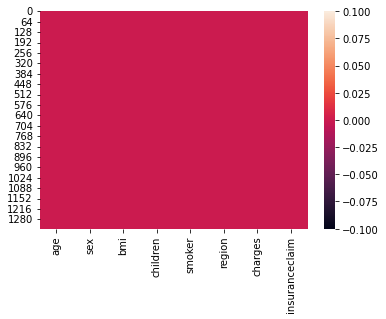

In [ ]:
# visualize
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# check data types
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [ ]:
# check duplicates
df.duplicated().sum()

1

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# cross check 
df.duplicated().sum()

0

In [ ]:
## Visualise 

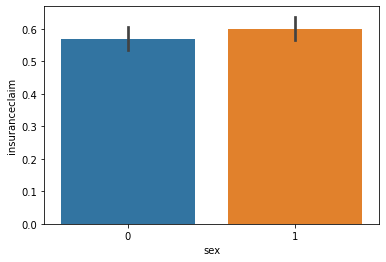

In [ ]:
#Sex 
sns.barplot(x='sex',y='insuranceclaim',data=df)
plt.show()

In [ ]:
# Conclusion:
#As seen above, male and female both claim insurance almost equally

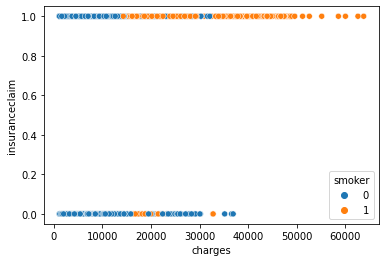

In [ ]:
sns.scatterplot(data=df,x='charges',hue='smoker',y='insuranceclaim')
plt.show()

In [ ]:
#conclusion:
#people with higher treatment charges are definately claim for insurance and they are smoker
#smoker is very much imprtant to predict output as smoker claim most
#so compnay can target smoker and have moderate and high income

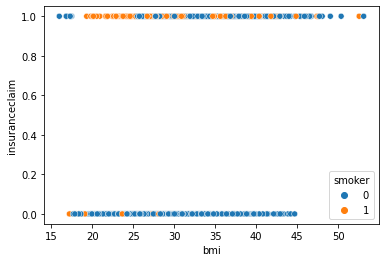

In [ ]:
sns.scatterplot(data=df,x='bmi',hue='smoker',y='insuranceclaim')
plt.show()

In [ ]:
#conclusion:
#people those claim for insurance are almost smoker 

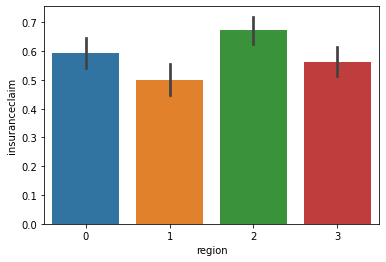

In [ ]:
sns.barplot(x='region',y='insuranceclaim',data=df)
plt.show()



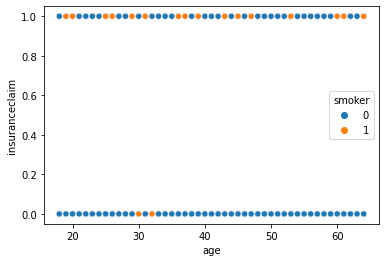

In [ ]:
sns.scatterplot(data=df,x='age',hue='smoker',y='insuranceclaim')
plt.show()

In [ ]:
#conclusion :
#we can see that age is not matter too much 

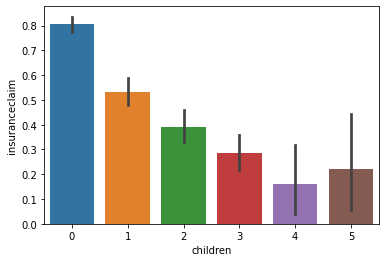

In [ ]:
sns.barplot(x='children',y='insuranceclaim',data=df)
plt.show()



In [ ]:
#conclusion :
#people with no childrens has more chances that they will claim for insurance  

In [ ]:
# select input and output
X=df.drop('insuranceclaim',axis=1)#input
Y=df['insuranceclaim']#output

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
# create model function
def create_model(model):
    model.fit(x_train,y_train)#train data
    y_pred=model.predict(x_test)#test data
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# use baseline model
from sklearn.linear_model import LogisticRegression
# crete object of logisticregression
lr=LogisticRegression()

In [ ]:
# call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.65      0.70       172
           1       0.76      0.86      0.81       230

    accuracy                           0.77       402
   macro avg       0.77      0.75      0.75       402
weighted avg       0.77      0.77      0.76       402

[[111  61]
 [ 33 197]]


In [ ]:
# apply decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# create object
dt=DecisionTreeClassifier(random_state=1)

In [ ]:
# call functiion 
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402

[[168   4]
 [  9 221]]


In [ ]:
# when I apply gini in decisiontreeclassifier i got recall 1=0.97 which is very good
#  accuracy for false negative 

In [ ]:
# show the information gain of all input features
IG=dt.feature_importances_

In [ ]:
dict={'input':X.columns,'IG':IG}
# convert into dataframe
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)# descending order accordiing to IG

,input,IG
3,children,0.377550
2,bmi,0.330158
4,smoker,0.180860
0,age,0.082568
6,charges,0.028864
1,sex,0.000000
5,region,0.000000


In [ ]:
# create object of decisiontreeclassifier apply entropy
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [ ]:
# call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       172
           1       1.00      0.98      0.99       230

    accuracy                           0.99       402
   macro avg       0.99      0.99      0.99       402
weighted avg       0.99      0.99      0.99       402

[[171   1]
 [  4 226]]


In [ ]:
# when i apply entropy in decisiontreeclassifier i got recall 1=0.98 which is very good accuracy for false negative 

In [ ]:
# pruning technique to reduce (overcome) overfitting
# 1.max_depth (<=8)
# 2.min_sample_leaf(>=45 or more <=100)

In [ ]:
#create object of decisiontrreclaassifier class and passing the parameter 
#max_depth
dt2=DecisionTreeClassifier(random_state=1,max_depth=8)

In [ ]:
# call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       172
           1       0.96      0.94      0.95       230

    accuracy                           0.95       402
   macro avg       0.94      0.95      0.94       402
weighted avg       0.95      0.95      0.95       402

[[163   9]
 [ 13 217]]


In [ ]:
# after applying max_depth on decisiontreeclassifier model we got 0.94 accuracy for 1 on recall

In [ ]:
#2nd purning technique : min_samples_leaf
#min_samples_leaf =45 or more means not less than=45
##create object of DecisionTreeClassifier class
#leaf node means no child

dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=55)

In [ ]:
# call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       172
           1       0.90      0.81      0.85       230

    accuracy                           0.84       402
   macro avg       0.84      0.84      0.84       402
weighted avg       0.85      0.84      0.84       402

[[151  21]
 [ 44 186]]


In [ ]:
# after applying min_samples on decisiontreeclassifier model we got 0.81 accuracy for 1 on recall

In [ ]:
# for i in range(45,101,5):
#   print(i)
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy') #by default gini
  #call funciton
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       172
           1       0.94      0.86      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

[[160  12]
 [ 33 197]]


In [ ]:
# after applying mean_samples on decisiontreeclassifier model with entropy we
#  got 0.86 accuracy for 1 on recall

In [ ]:
# use ensembling technique on insurance dataset 
#random foresttree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# # create object
# for i in range(1,200):
#     rfc=RandomForestClassifier(n_estimators=i,max_features=5,random_state=1)
#     print('no of decision tree',i)
#     #call function
#     rfc=create_model(rfc)

In [ ]:
rfc=RandomForestClassifier(n_estimators=6,max_features=5,random_state=1)
# call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       172
           1       0.97      0.96      0.96       230

    accuracy                           0.96       402
   macro avg       0.96      0.96      0.96       402
weighted avg       0.96      0.96      0.96       402

[[166   6]
 [ 10 220]]


In [ ]:
# after applying RandomForest ensemble technique we got 0.96 accuracy for 1 on recall

In [ ]:
# Boosting

In [ ]:
# Boosting technique : it is also ensembling tech
# 1.ADA boosting means adaptor boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# # create object for AdaBoostClassifier class
# for i in range(1,17):
#   ada=AdaBoostClassifier(random_state=1,n_estimators=i)
#   print('no of features',i)
#   ada=create_model(ada) #call function

In [ ]:
ada=AdaBoostClassifier(random_state=1,n_estimators=10)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       172
           1       0.85      0.90      0.87       230

    accuracy                           0.85       402
   macro avg       0.85      0.84      0.85       402
weighted avg       0.85      0.85      0.85       402

[[134  38]
 [ 22 208]]


In [ ]:
# after applying  AdaBoostClassifier ensemble technique we got 0.90 accuracy for 1 on recall

In [ ]:
# call gradientboostingclassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# # create class of gradientboostingclassifier class
# for i in range(1,101):
#   gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
#   #call function
#   print('no of n_estimators',i)
#   gbc=create_model(gbc)
#   # n_estimator can be <=100
#   #algo. use decisiontreeclassifier

In [ ]:
gbc=GradientBoostingClassifier(random_state=1,n_estimators=35)
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       172
           1       0.97      0.96      0.96       230

    accuracy                           0.96       402
   macro avg       0.96      0.96      0.96       402
weighted avg       0.96      0.96      0.96       402

[[164   8]
 [  9 221]]


In [ ]:
# after applying  GradientBoostingClassifier ensemble technique we got 0.96 accuracy for 1 on recall

In [ ]:
# Extreme gradient boosting:XGB Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# # create object of class xgbclassifier
# for i in range(1,101):
#   xgc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
#   #call function
#   print('no of estimators',i)
#   xgc=create_model(xgc)
#   #automatic overfitting:reg means regularizationi and alpha or lambda
#   #hyperparameter
#   #n_enstimators<=100

In [ ]:
xgc=XGBClassifier(n_estimators=17,random_state=1,reg_alpha=1)
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       172
           1       0.97      0.90      0.93       230

    accuracy                           0.92       402
   macro avg       0.92      0.93      0.92       402
weighted avg       0.93      0.92      0.92       402

[[165   7]
 [ 24 206]]


In [ ]:
# after applying  XGB Boosting ensemble technique we got 0.90 accuracy for 1 on recall

In [ ]:
# linear kernel function
# call class
from sklearn.svm import LinearSVC
# linearsvc means linear support vector classifier
# create object
svc=LinearSVC(random_state=1) #hard margin default

In [ ]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.76      0.20      0.32       172
           1       0.62      0.95      0.75       230

    accuracy                           0.63       402
   macro avg       0.69      0.58      0.53       402
weighted avg       0.68      0.63      0.57       402

[[ 35 137]
 [ 11 219]]


In [ ]:
# check whether model is overfit or not means add external error
# during training time
# create object
svc1=LinearSVC(random_state=1,C=0.5) 
# here c inbuiilt parameeter which pass the values =0.5(0.001to 1)
# value of c<=1

In [ ]:
# call funcitoin
svc=create_model(svc1)

              precision    recall  f1-score   support

           0       0.76      0.20      0.32       172
           1       0.62      0.95      0.75       230

    accuracy                           0.63       402
   macro avg       0.69      0.58      0.53       402
weighted avg       0.68      0.63      0.57       402

[[ 35 137]
 [ 11 219]]


In [ ]:
# after applying  Support vector model we got 0.95 accuracy for 1 on recall and 0.20 for 0 on recall

In [ ]:
# use k-nn algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# create object
knn=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5

In [ ]:
knn=create_model(knn)

              precision    recall  f1-score   support

           0       0.54      0.47      0.50       172
           1       0.64      0.70      0.67       230

    accuracy                           0.60       402
   macro avg       0.59      0.58      0.58       402
weighted avg       0.60      0.60      0.60       402

[[ 80  92]
 [ 68 162]]


In [ ]:
# conclusion:
# after applying  KNN model we got 0.70 accuracy for 1 on recall and 0.47 for 0 on recall

In [ ]:
#CONCLUSION:
#after training with multiples algorithms we got highest accuracy for decision tree 
# classifier which was arround 98% recall
#so we can deploy model with Decision Tree algorithmns with criteria as entropy index